In [2]:
# -- LOAD LIBRARIES -- #
import scipy.io as scio
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests
import openpyxl
from datetime import datetime as dt
from datetime import timedelta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import Button, Layout
import mplcursors
import os
from itertools import chain
from matplotlib.widgets import Button
from pathlib import Path
import xlrd
import warnings
import matplotlib.dates as mdates
import seaborn as sns
import random
import ipywidgets as widgets
import csv
import scipy
import math as m
%run mutateBORISandVID.ipynb
%run getfeedBORISObs.ipynb
%run makePRHObs.ipynb
%run plotBORISObsDepthRoll.ipynb
%run plotQCRolls.ipynb
%run plotQCSlim.ipynb
%run getTagOnOff.ipynb
%run getTides.ipynb
%run plotTideRollDepth.ipynb
%run descTidalChar.ipynb

warnings.simplefilter('ignore')


In [3]:
# -- LOAD DATA -- #
# ------------------------ User defined variables --------------------------------------- #
fs = 10 # What's the sampling rate of the prh/speed file you want to pull?
os.chdir('C:\\01_Work\\1Project Home\\1Research\\GRAYS\\_ERLATFEED')
# --------------------------------------------------------------------------------------- #
datpth = "C:\\01_Work\\1Project Home\\1Research\\GRAYS\\_tag data\\"
cdir = str(os.getcwd())

depID = input('Which deployment is being analyzed?')                                           # get the deployment ID for naming and pulling files
prh = scio.loadmat(datpth + depID + "\\" + depID + " 10Hzprh.mat")       # prh file
#speed = scio.loadmat(datpth + depID + "\\" + depID + "_10HzSpeed.mat")   # speed file
#speed = pd.DataFrame(speed['spd'])                                             # 
feed = pd.read_csv(datpth + depID + "\\feed\\"+ depID + "_rolls.csv")         # feeding file
finalfeed = pd.read_excel(cdir + '\\analysisoutput\\'+depID+'\\'+depID+'-feed+tide.xlsx')
dems = pd.read_excel("C:\\01_Work\\1Project Home\\1Research\\GRAYS\\mastertracker_GRAYS.xlsx") # demographic information
mastfeed = pd.read_excel(cdir + '\\analysisoutput\\master-feed+tide.xlsx')
mastsum = pd.read_excel(cdir + '\\analysisoutput\\master-sumfeed.xlsx')


Which deployment is being analyzed? er230416-70


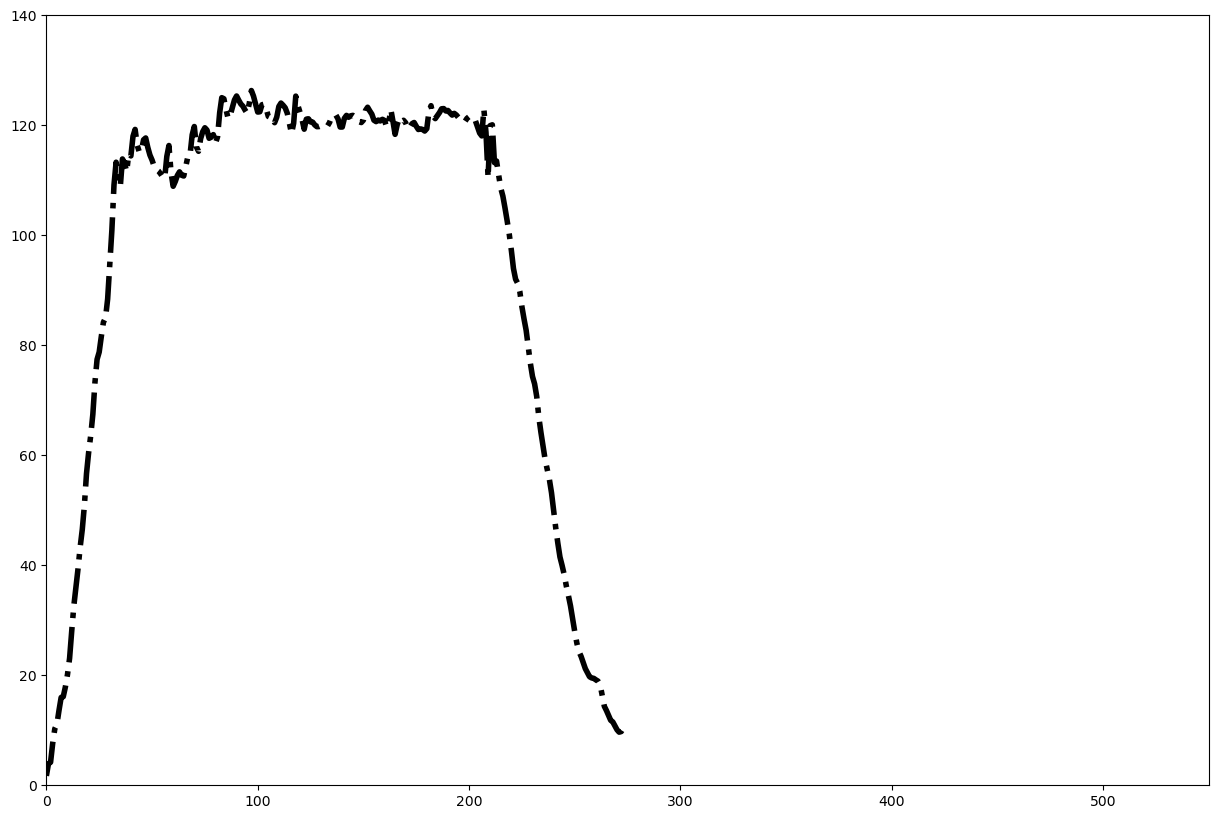

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))
i = 161
sI, eI = feed.loc[i, 'sFEI'], feed.loc[i, 'eFEI']
data_to_plot_radians = prh.get('roll')[sI:eI + 1]

# Convert radians to degrees
data_to_plot_degrees = np.degrees(data_to_plot_radians)

plt.plot(data_to_plot_degrees, color='black', linestyle='dashdot', linewidth=4)

# Set axis limits
plt.xlim(0, 550)
#plt.xlim(0, len(data_to_plot_degrees))
#plt.ylim(0, max(data_to_plot_degrees)+10)
plt.ylim(0, 140)
# Set x-axis intervals to every 100
#plt.xticks(np.arange(0, len(data_to_plot_degrees), 100))
plt.xticks(np.arange(0, 550, 100))

# Remove x and y titles
plt.xlabel('')
plt.ylabel('')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))

sI, eI = feed.loc[161, 'sFEI'], feed.loc[161, 'eFEI']
data_to_plot_radians = prh.get('roll')[sI:eI + 1]

# Convert radians to degrees
data_to_plot_degrees = np.degrees(data_to_plot_radians)

plt.plot(data_to_plot_degrees, color='black', linestyle='dashdot', linewidth=4)

# Set axis limits
plt.xlim(0, len(data_to_plot_degrees))
plt.xticks(range(0, 300, 100), fontsize=32)
plt.ylim(0, max(data_to_plot_degrees)+10)

# Remove x and y titles
plt.xlabel('')
plt.ylabel('')

plt.show()


In [ ]:
plt.figure(figsize=(32,2.5))  # Adjust the width and height as needed

# Plot a line for each row in 'feed'
for i in range(len(feed)):
    sI, eI = feed.loc[i, 'sFEI']-800, feed.loc[i, 'eFEI']+601
    # Extract the relevant data from 'prh' for the current row
    data_to_plot = prh.get('p')[sI:eI + 1]

    # Plot the line
    plt.plot(data_to_plot, color='black', alpha=0.1)
plt.ylim(bottom=0)
plt.xlim(left=0)

plt.gca().invert_yaxis()
# Increase the size of y-axis ticks
plt.yticks(fontsize=32)  # Adjust fontsize as needed
plt.xticks(range(0, 4200, 600), fontsize=32)  # Set x-tick intervals
# Show the plot
# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(33,2.5))  # Adjust the width and height as needed
rolldat = np.degrees(prh.get('roll'))
# Plot a line for each row in 'feed'
for i in range(len(feed)):
    sI, eI = feed.loc[i, 'sFEI']-800, feed.loc[i, 'eFEI']+601
    # Extract the relevant data from 'prh' for the current row
    data_to_plot = rolldat[sI:eI]

    # Plot the line
    plt.plot(data_to_plot, color='black', alpha=0.1)
plt.ylim(top=140,bottom=0)
plt.xlim(left=0)

# Increase the size of y-axis ticks
plt.yticks(fontsize=32)  # Adjust fontsize as needed
plt.yticks(range(0, 150, 30), fontsize=32)  # Set x-tick intervals
plt.xticks(range(0, 4200, 600), fontsize=32)  # Set x-tick intervals
# Show the plot
# Show the plot
plt.show()